---
title: "PA 8.1: KNN and Decision Trees"
author: "Owen Hanson"
date: "2024-11-15"
output: 
    html:
        theme: "cosmo"
embed-resources: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [7]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
!pip install palmerpenguins
import palmerpenguins as pp
pen = pp.load_penguins()

pen = pen.dropna()

X = pen.drop([ "bill_depth_mm"], axis = 1)
y = pen["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [10]:
#MLR
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include = object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

mlr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("mlr", LinearRegression())]
).set_output(transform="pandas")

mlr_pipeline.fit(X_train, y_train)

lr_mse = cross_val_score(mlr_pipeline, X_train, y_train, cv = 5, scoring = "neg_mean_squared_error").mean() * -1
lr_mse

0.6459842213393018

In [15]:
#KNN 5
knn_pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_5", KNeighborsRegressor(n_neighbors=5))]
).set_output(transform="pandas")

knn_pipeline.fit(X_train, y_train)
knn_5 = cross_val_score(knn_pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1
knn_5

1.1918801266395296

In [16]:
#KNN 10
knn_pipeline10 = Pipeline(
  [("preprocessing", ct),
  ("knn_5", KNeighborsRegressor(n_neighbors=10))]
).set_output(transform="pandas")

knn_pipeline10.fit(X_train, y_train)
knn_10 = cross_val_score(knn_pipeline10, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1
knn_10

1.1829089461781996

In [19]:
#Decision Tree
dtree_pipeline = Pipeline(
  [("preprocessing", ct),
  ("dec_tree", DecisionTreeRegressor())]
).set_output(transform="pandas")


d_tree = cross_val_score(dtree_pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1
d_tree

1.530663500678426

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bindot.py:122: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


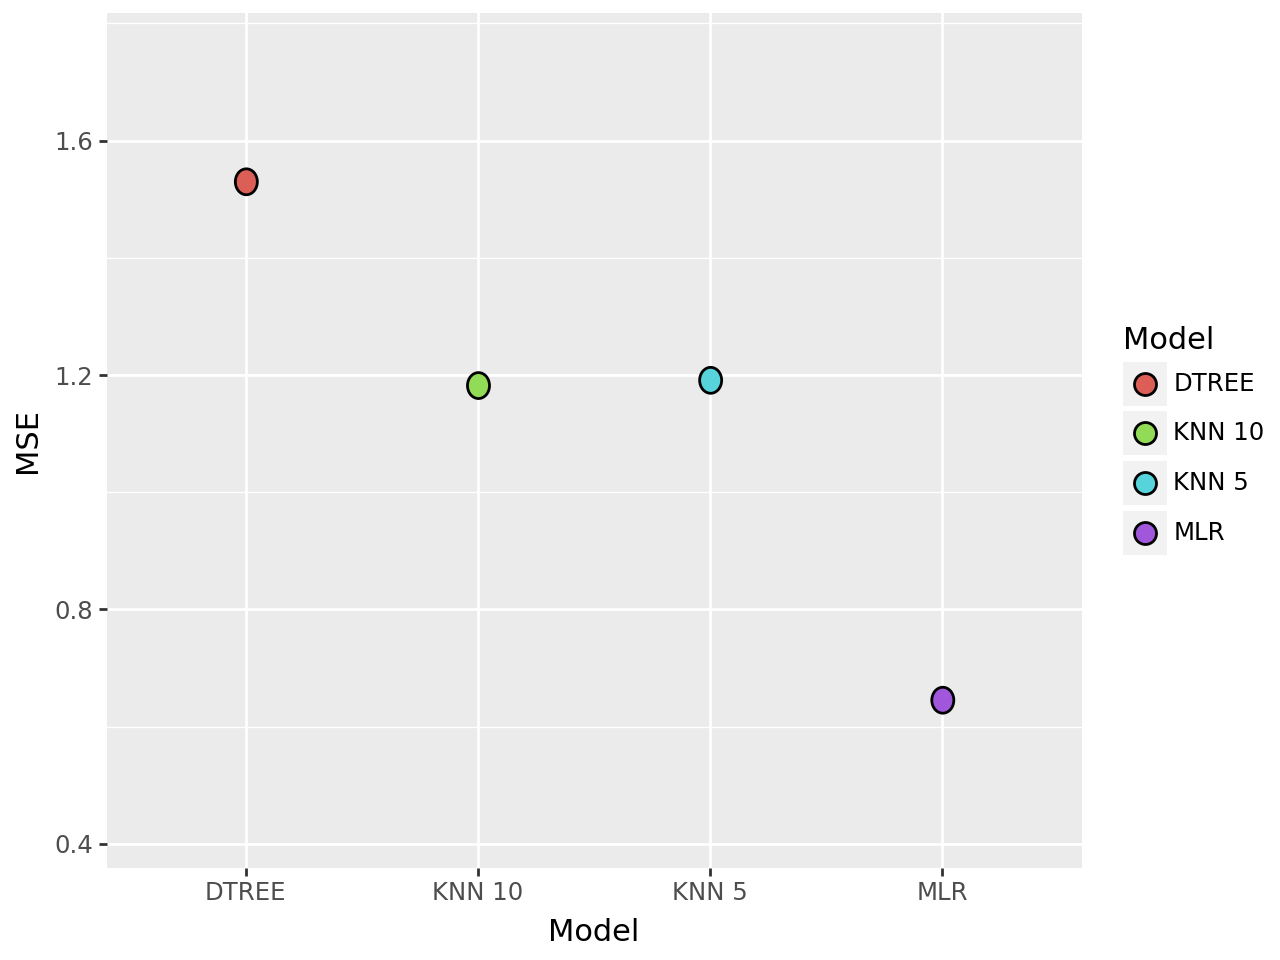

In [38]:
#plot
from plotnine import *
plot_df = pd.DataFrame(
    [
        ["MLR", lr_mse],
        ["KNN 5", knn_5],
        ["KNN 10", knn_10],
        ["DTREE", d_tree]
    ],
    columns=["Model", "MSE"]
)

(
    ggplot(plot_df, aes(x="Model", y="MSE", fill = "Model")) +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.1)
)